<a href="https://colab.research.google.com/github/paolo-ferrara/NEU_IE7275_DataMining/blob/main/Paolo_Ferrara_IE7525_PIMA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Business Context

**Problem Setting**

Diabetes is a very common chronic disease that affects millions of people worldwide today. It can have major consequences on the health and general well-being of those affected, and an early and effective diagnosis can help to recognize the disease well in advance, prepare an appropriate pharmacological therapy and therefore mitigate the impacts by improving the quality of life of those affected and reducing costs and pressure on the healthcare system.

**Problem Definition**

Our goal is maybe ambitious: wouldn’t be great if we could find a way to predict if a person might have diabetes or not, starting from a set of information we already know about the patient? For example, thanks to our analysis and prediction model we could answer the following questions:
* Is a person with a high BMI or blood pressure more likely to develop diabetes?
* Are woman with a high number of pregnancies less prone to develop diabetes?

In addition, the benefits of an analysis of this type could also have implications on aspects related to prevention: being able to identify with reasonable certainty if and which factors contribute to the development of diabetic disease can help people to correct their lifestyle habits to improve their physical/clinical condition.

**Data Source**

For this problem we’re going to use the following dataset, available on Kaggle:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

According to Wikipedia, the Akimel O'odham (O'odham for "river people"), also called the Pima, are an Indigenous people of the Americas living in the United States in central and southern Arizona and northwestern Mexico in the states of Sonora and Chihuahua. The majority population of the two current bands of the Akimel O'odham in the United States is based in two reservations: the Keli Akimel Oʼodham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC). [source: Akimel O'odham - Wikipedia]

**Dataset Definition**

The dataset contains a total of 768 observations and 8 features, including the target variable, related to a women population from Phoenix, Arizona, USA.
Following is the list of the available features and a short description:

-	*Pregnancies*: Number of times pregnant
-	*Glucose*: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
-	*BloodPressure*: Diastolic blood pressure (in mm Hg)
-	*SkinThickness*: Triceps skin fold thickness (mm)
-	*Insulin*: 2-Hour serum insulin (mu U/ml)
-	*BMI*: Body mass index (weight in Kg / (height in m)^2)
-	*DiabetesPedigreeFunction*: Diabetes pedigree function
-	*Age*: age of the patient in years
-	*Outcome*: Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)


## Project Setup

In [381]:
# Importing necessary libraries for data manipulation
import numpy as np
import pandas as pd
import random as rnd

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures that graphs are displayed inline in the Jupyter Notebook
%matplotlib inline

# Importing libraries for pre-processing and model building
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Importing machine learning algorithms from scikit-learn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing libraries for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [382]:
# Load the Pima Indians Database
# The dataset can be downloaded from this url
path_to_file = './diabetes.csv'
df = pd.read_csv(path_to_file)

# Display the first five rows of the dataset to get an overview of the data structure and contents
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [383]:
df.shape

(768, 9)

The dataset contains a total of 768 observations and 9 features, including the target variable, related to a women population from Phoenix, Arizona, USA.

Following table lists the features available in this dataset and the associated  description:

| Column Name | Description |
|-------------|-------------|
| `Outcome`                  | Whether the patient has diabetes or not (0 = No, 1 = Yes) |
| `Pregnancies`              | Number of times pregnant |
| `Glucose`                  | Two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl |
| `BloodPressure`            | Diastolic Blood Pressure in mmHg |
| `SkinThickness`            | Triceps skin fold thickness in mm |
| `Insulin`                  | 2-Hour serum insulin (mu U/ml) |
| `BMI`                      | Body mass index (weight in Kg / (height in m)^2) |
| `DiabetesPedigreeFunction` | Diabetes pedigree function |
| `Age`                      | age of the patient in years |


In [384]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


All columns have the correct data type and there are no missing values.

In [385]:
# Display a statistical summary of numeric columns
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From the statistical summary above we can see that:
*   **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin** and **BMI** have a minimum value of 0, which is not acceptable from a clinical standpoint. We should further investigate and see how we can fix these values
*   Maximum number of **Pregnancies** is 17, which is very high if compared with the mean of the populaton 3.84). This is a clear indication that we have some outliers
*   **Age** of patients is in the range from 21 to 81 years
*   **Outcome** has a mean value of 34.9, which means that 34.9% of the patients have diabetes.

Let's calculate the exact distribution of the target variable:





In [386]:
df['Outcome'].value_counts(normalize=True)*100

,proportion
Outcome,
0,65.104167
1,34.895833


In [387]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Out of 768 women, 268 have diabetes (i.e. 34.9% of the total) and 500 do not.

## Data Cleaning

Let's check again for the presence of any missing value in the dataset

In [388]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no missing values in the dataset. However, we have observations with a value of 0 in features where such values are not meaningful from a clinical perspective (e.g. Blood Pressure, Glucose, etc).

In [389]:
# Let's create a list of columns that contain 0 values
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
  # replace values with nan
  df[col] = df[col].replace(0, np.nan)

In [390]:
# number of null values for each column
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Insulin** and **SkinThickness** are the attributes with a higher number of null values, let's look at the correlation with the target variable before deciding the strategy to deal with these null values

In [391]:
df.corr()["Outcome"].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.494650
BMI,0.313680
Insulin,0.303454
SkinThickness,0.259491
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.170589


These columns have medium correlation with the target variable and might be relevant for our model, so we decided to keep them and impute missing values with the median or the mean according to their statistical distribution:

- if distribution is **symmetric**, mean is the preferred choice
- if distribution is **asyimmetric** and/or skewed, we whould use median



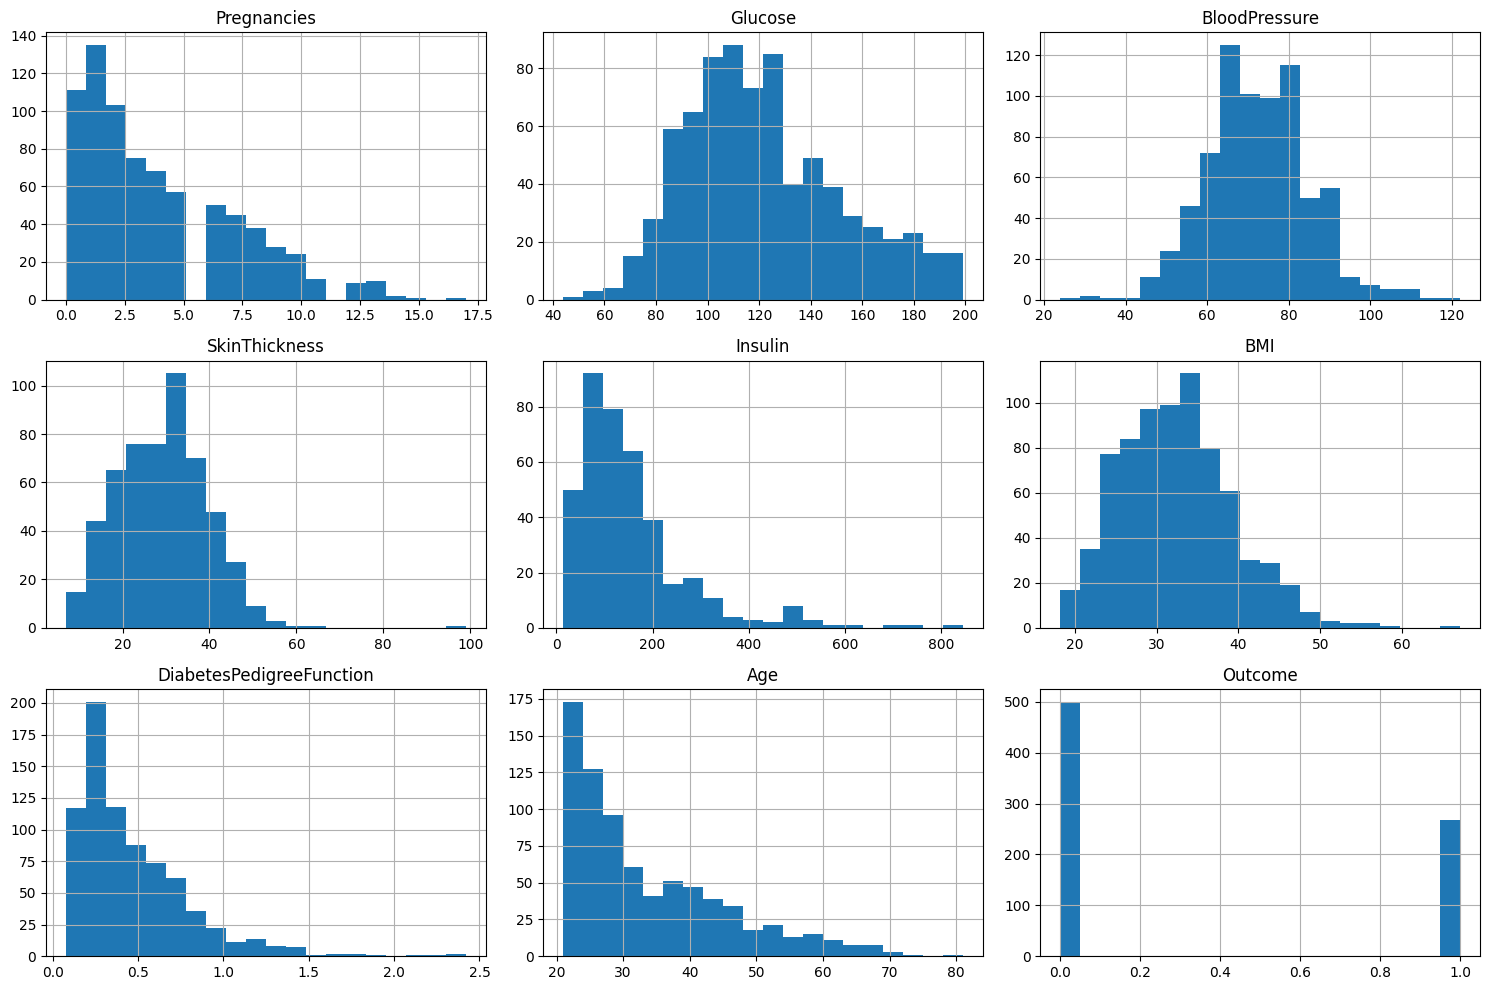

In [392]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [393]:
# Insulin and SkinThickness have a normal distribution so we impute missing values with the median
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

In [394]:
# final check we have no more missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [395]:
# Function to cap outliers
def cap_outliers(df, lower_percentile=0.25, upper_percentile=0.75):
    df_capped = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        q1 = df[col].quantile(lower_percentile)
        q3 = df[col].quantile(upper_percentile)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df_capped[col] = np.clip(df[col], lower, upper)

    return df_capped

In [396]:
# Capping outliers using IQ range criterion
df = cap_outliers(df)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

Let's start by calculating skew and curtosis of each column and then by plotting the distribution of each column in the dataset

In [397]:
df.skew().sort_values(ascending=False)

,0
Age,1.067170
DiabetesPedigreeFunction,1.024428
Pregnancies,0.853962
Outcome,0.635017
Glucose,0.535587
BMI,0.349882
BloodPressure,0.105665
SkinThickness,-0.057643
Insulin,-0.118221


Skew values are:
- significant (>1) for **Insulin**,  **DiabetesPedigreeFunction** and **Age**
- moderate (between 0.5 and 1) for **Pregnancies**, **SkinThickness**, **Glucose**, **BMI** and **Glucose**

In all cases we expect distribution to be skewed on the right

In [398]:
df.kurtosis().sort_values(ascending=False)

,0
Age,0.330970
DiabetesPedigreeFunction,0.297447
BloodPressure,0.212270
Pregnancies,-0.070853
BMI,-0.199560
Glucose,-0.257847
SkinThickness,-0.356318
Insulin,-0.915841
Outcome,-1.600930


Kurtosis values shows that:
- we expect leptokurtic when values are postive, and especially with **Insulin**, **DiabetesPedigreeFunction**, **SkinThickness** and **BloodPressure**
- we expect platykurtic for **Glucose**

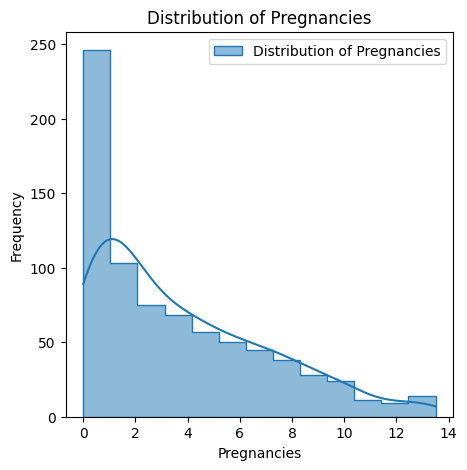

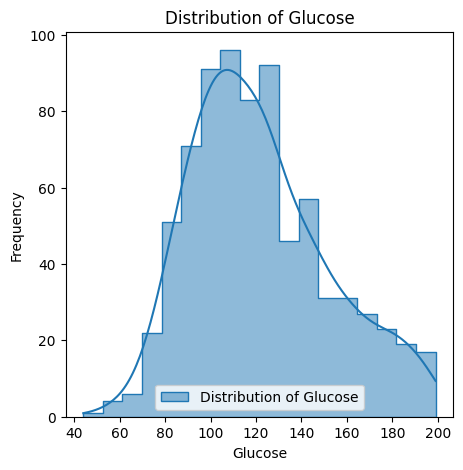

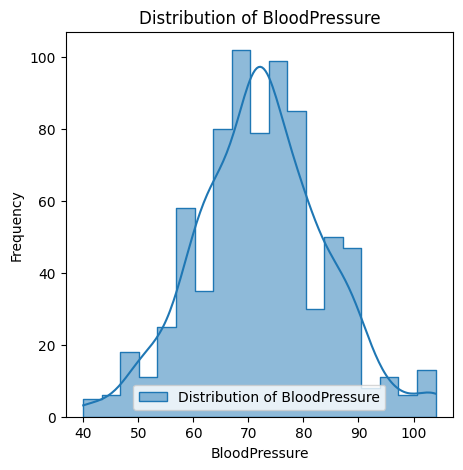

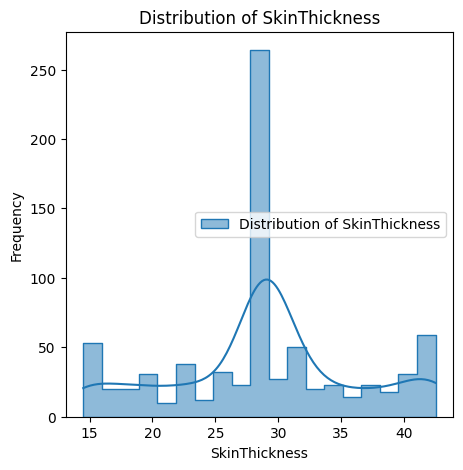

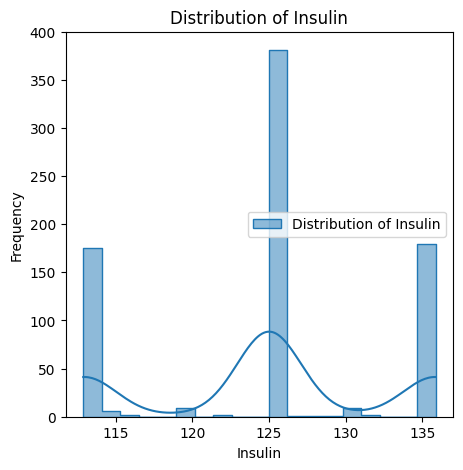

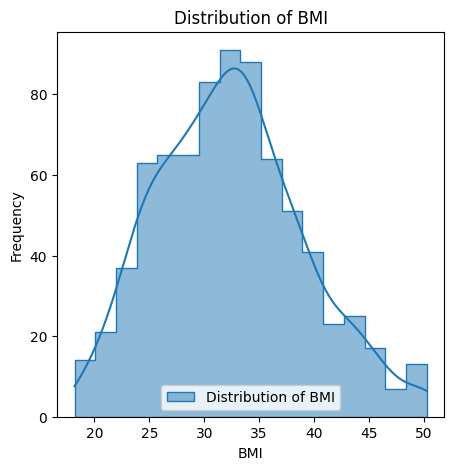

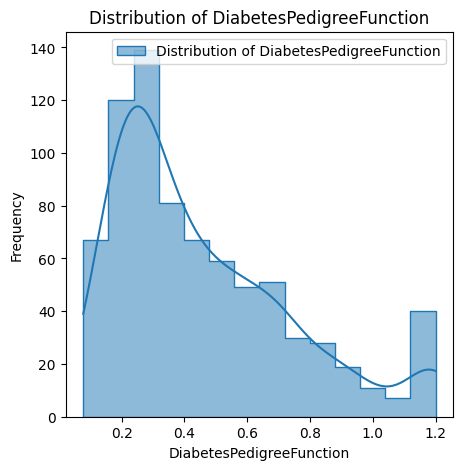

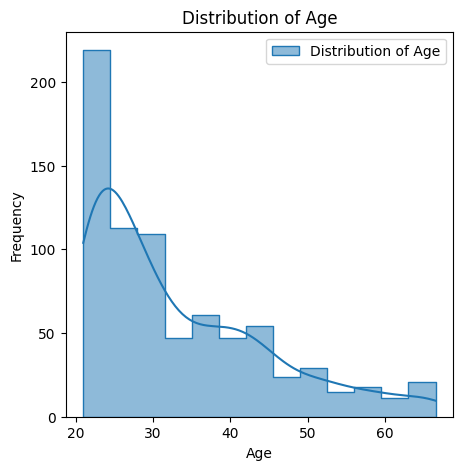

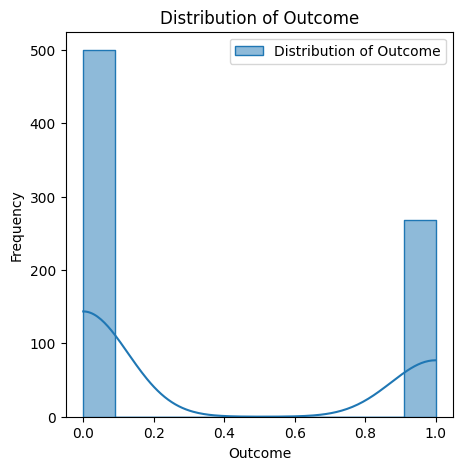

In [399]:
for column in df.columns:
  # Set up the matplotlib figure
  plt.figure(figsize=(5, 5))
  sns.histplot(data=df, x=column, kde=True, element='step', label='Distribution of '+column)
  plt.title('Distribution of ' + column)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show();

#### Insights

- **Pregnancies** has a peak around 2 and a tail on the right with extreme values (>15)
- **Glucose** has a normal distribution, centered around 100-120, with a thicker tail on the right
- **BloodPressure** has a normal and symmetric distribution witha peak aound 70 mmHg
- **SkinThickness**, **Insulin** and **BMI** has similar and normal distribution with a very long tail on the right
- **DiabetesPedigreeFunction** has a peak around 0.2-0.3 and is rightly skewed
- **Age** has a peak in the lower range between 20 and 25 with a very long right tail and extreme values over 80 ys



### Multivariate analysis

#### Bivariate Analysis

In [400]:
# Distribution of predictors mean value vs Outcome
df.groupby(["Outcome"]).mean().T

Outcome,0,1
Pregnancies,3.298000,4.843284
Glucose,110.682000,142.130597
BloodPressure,70.912000,75.055970
SkinThickness,27.668000,31.102612
Insulin,123.148750,127.568563
BMI,30.867400,35.240299
DiabetesPedigreeFunction,0.420264,0.531022
Age,31.135000,37.052239


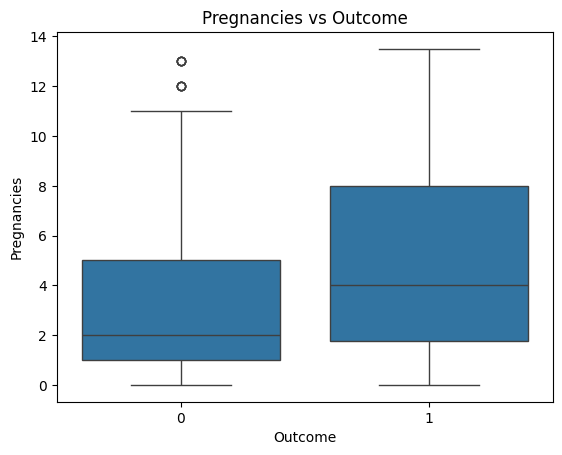

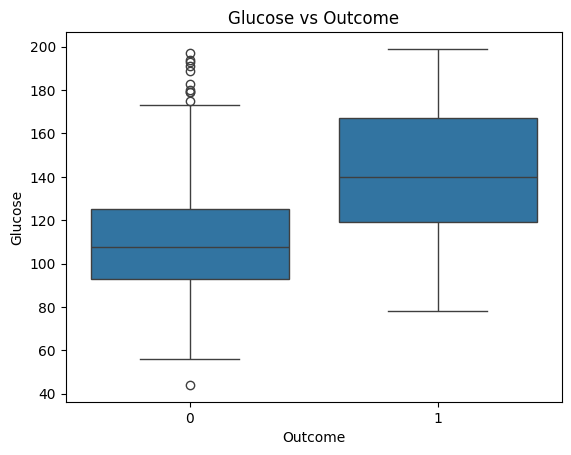

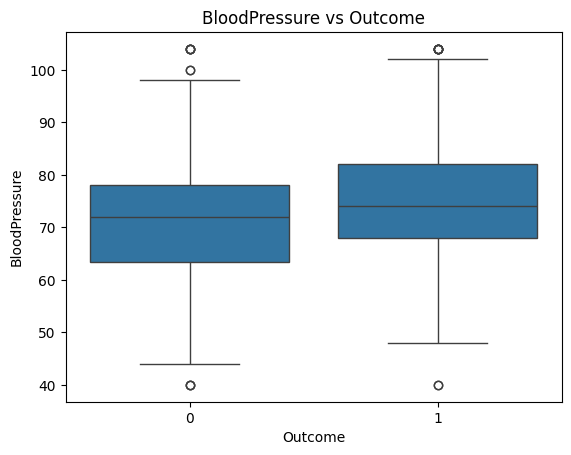

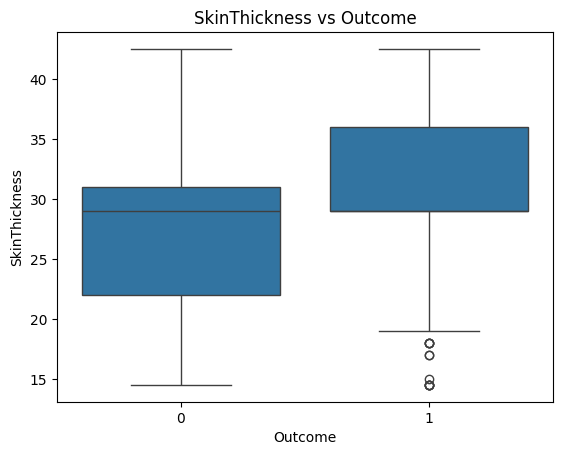

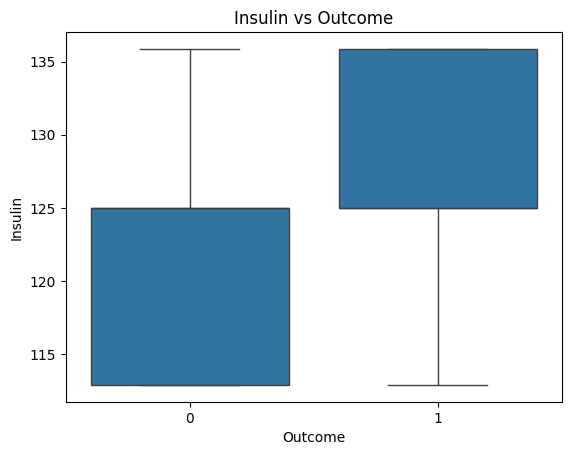

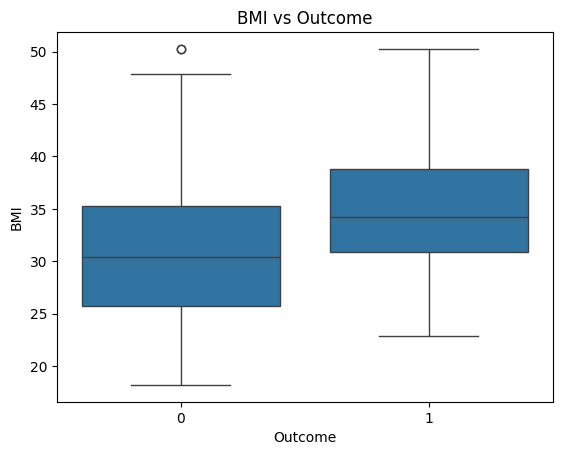

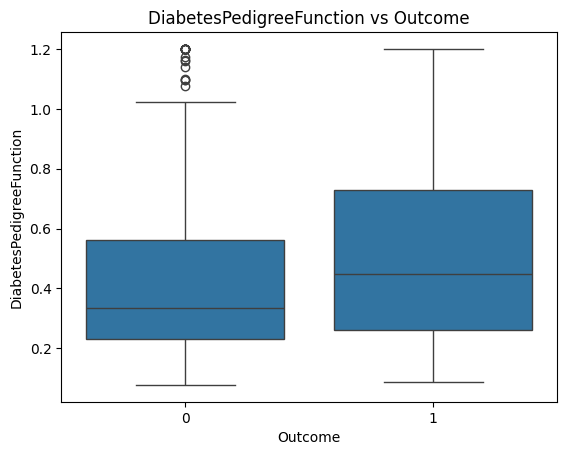

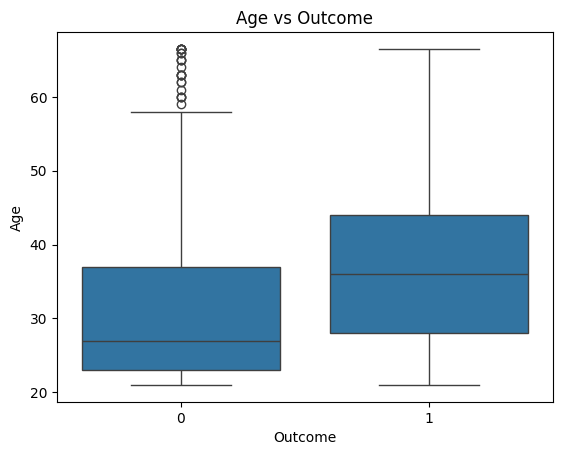

In [401]:
# Boxplot of each predictors vs target variable
for col in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")

#### Insights

We see a similar pattern for all the variables, i.e. when outcome = 1 (patient tested positive) predictors have higher mean a IQ range. This is particular evident for Glucose, SkinThickess and Insulin.

Boxplot is also a good visualization tool to detect the presence of outliers

#### Pair plot

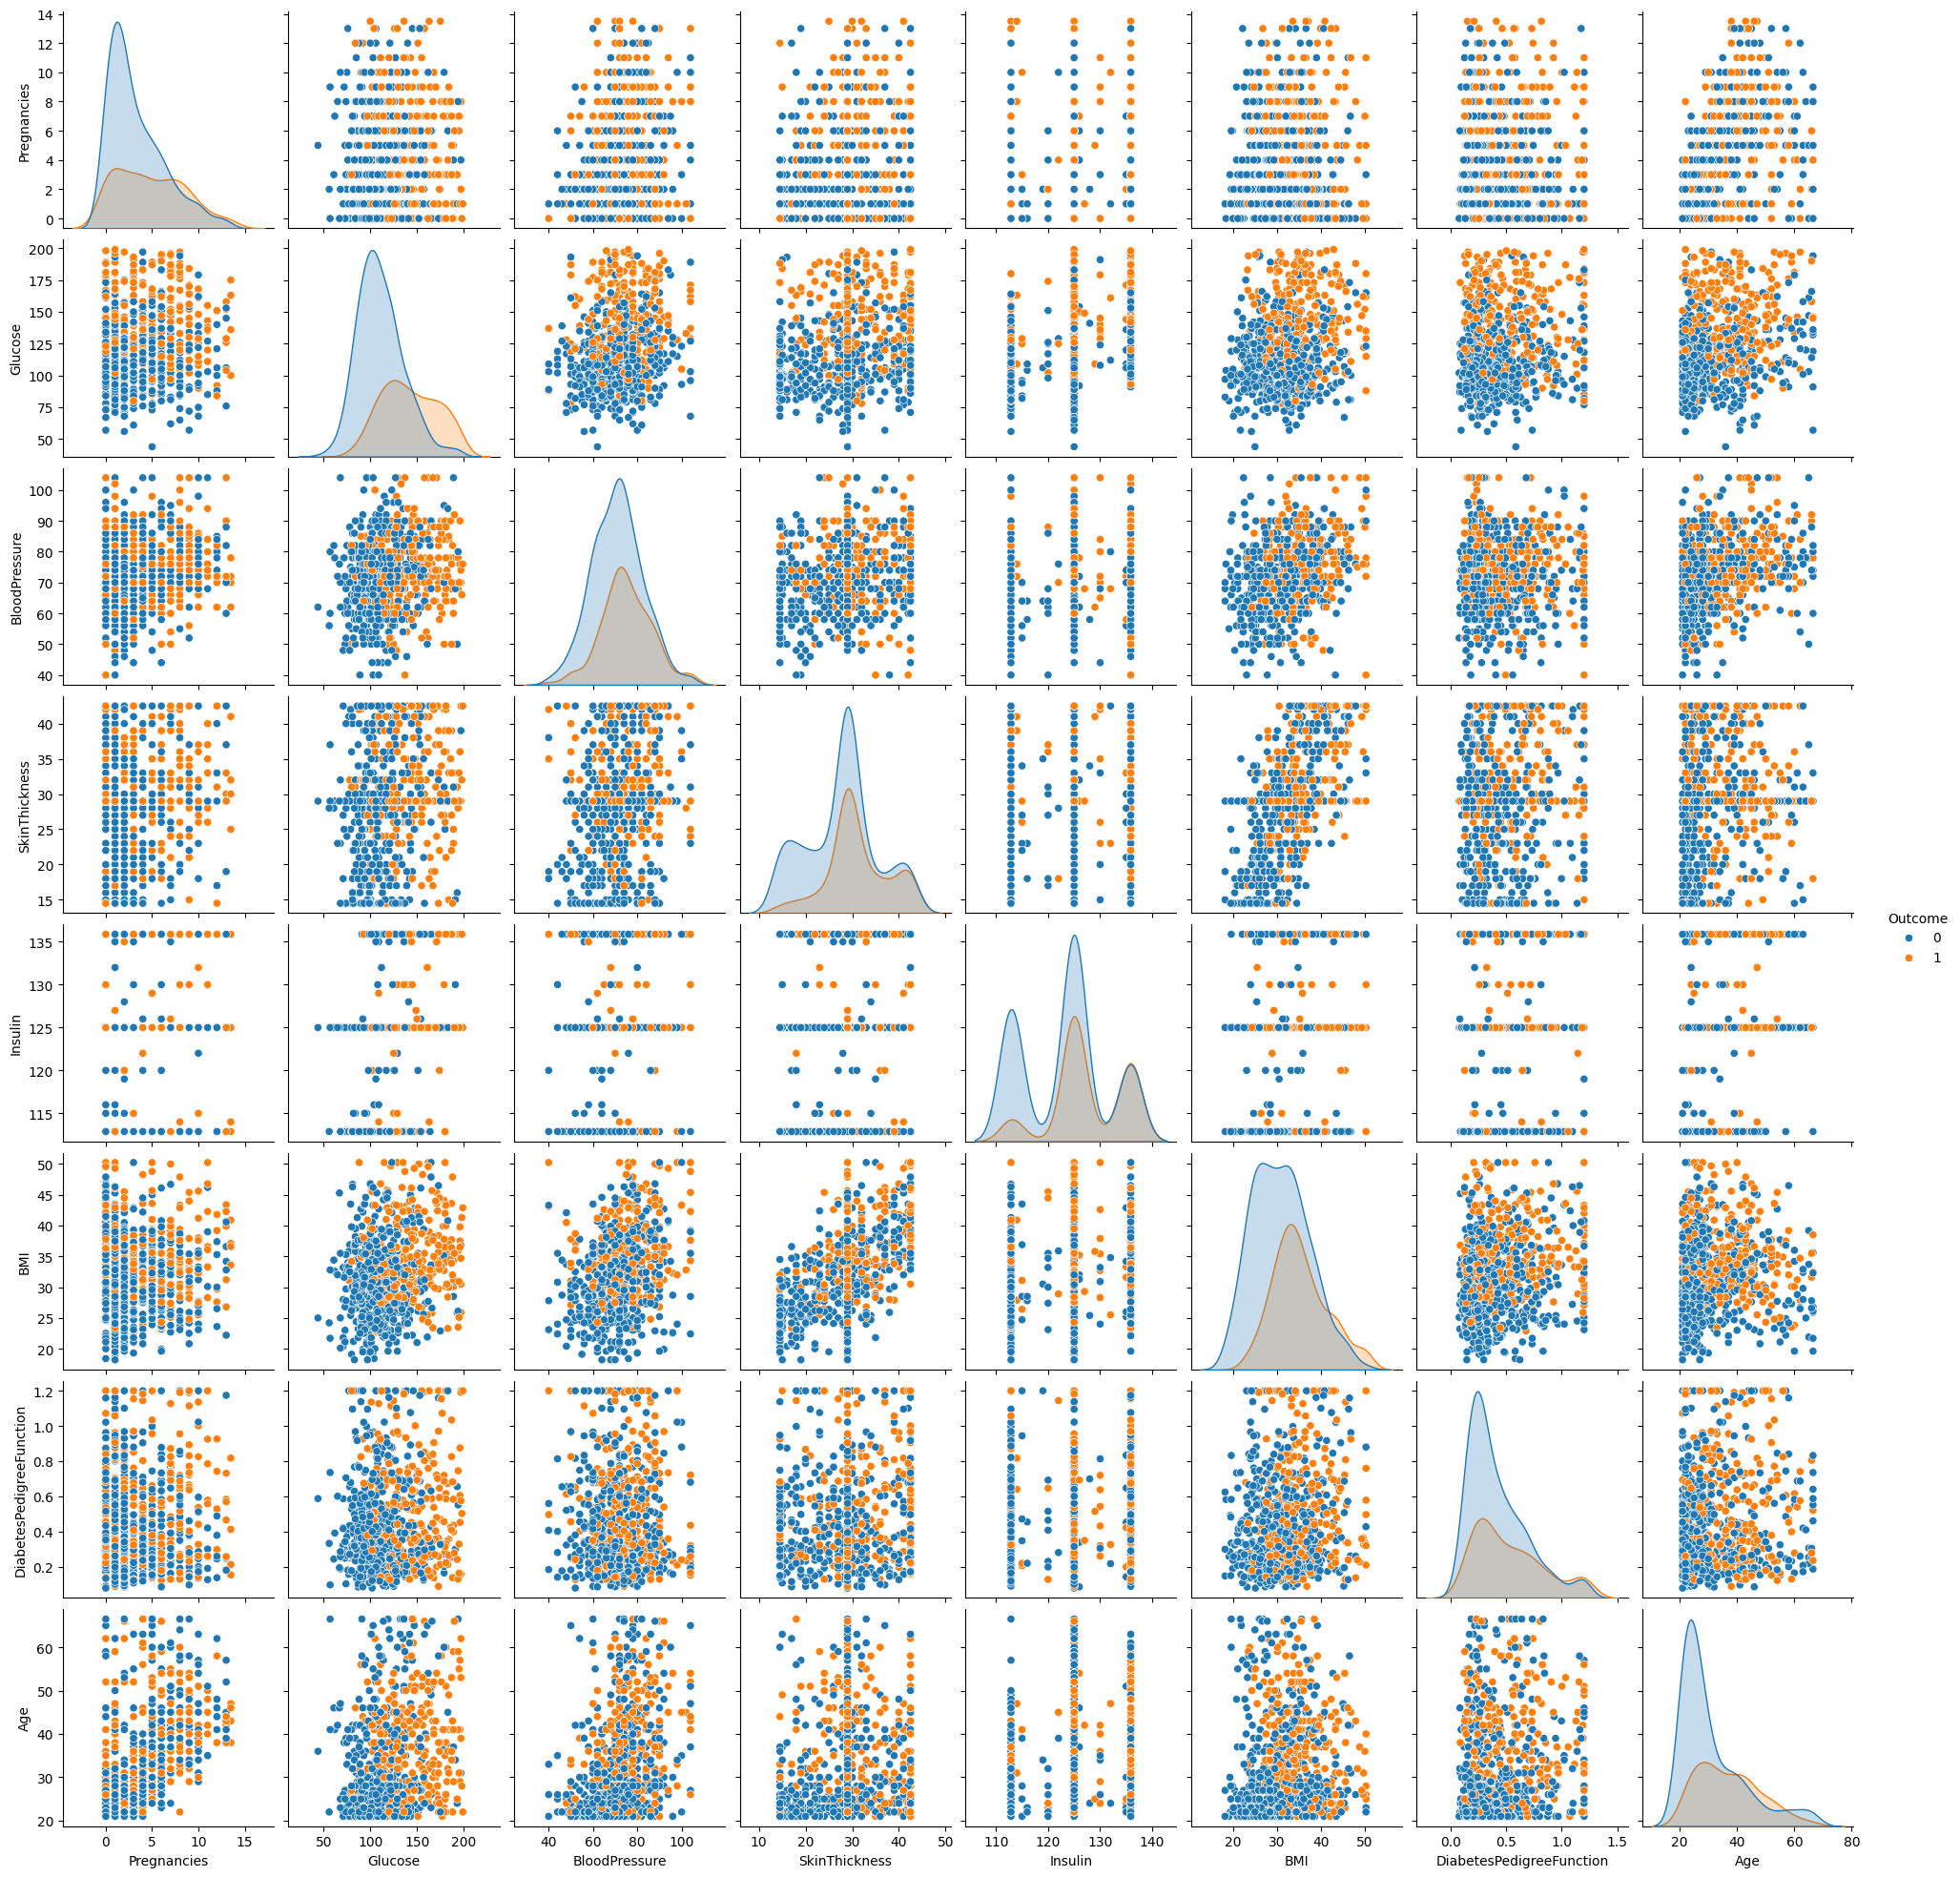

In [402]:
# Visualizing relationships using pair plots for selected features
sns.pairplot(data=df, vars=df.columns[:-1], hue='Outcome')
plt.show()

From the pair plot we can't see any obvious relationship between variables

#### Correlation Matrix

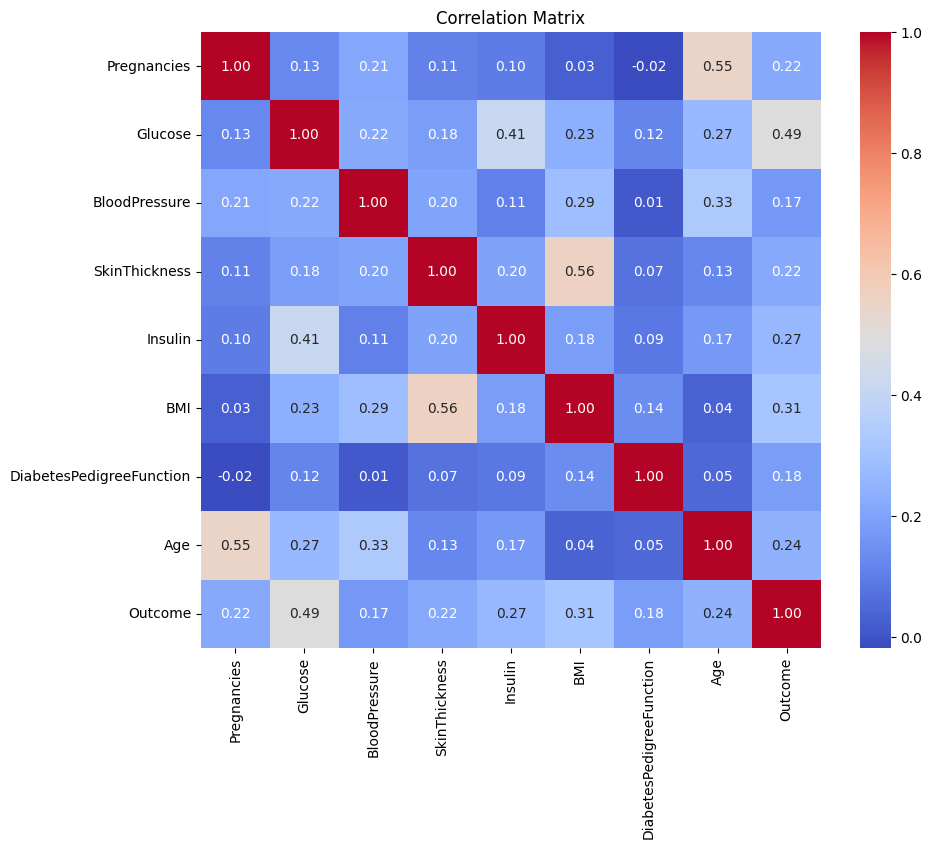

In [403]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[df.columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Insights

From the correlation matrix we see a medium correlation (between 0.3 and 0.5) between BMI and SkinThickness, Age and Pregnancies, Age and BloodPressure

## Data Pre-Processing

In [404]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Data Augmentation

In [405]:
from collections import Counter
print("Classes distribution before:", Counter(y))

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

print("Classes distribution after SMOTE:", Counter(y))

Classes distribution before: Counter({0: 500, 1: 268})
Classes distribution after SMOTE: Counter({1: 500, 0: 500})


### Train Test Split

In [406]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature scaling

In [407]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Testing

### Models used

- **Machine Learning Algorithms**:
  - **`LogisticRegression`**: A statistical model that in its basic form uses a logistic function to model a binary dependent variable. In the context of machine learning, it is used for binary classification tasks.
  - **`SVC`** and **`LinearSVC`**: Variants of SVM (Support Vector Machine) used for different types of classification tasks. While `SVC` is used for classifying with kernels, `LinearSVC` is used for linear classification.
  - **`RandomForestClassifier`**: An ensemble learning method for classification that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.
  - **`KNeighborsClassifier`**: Implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.
  - **`Naive Bayes`**: A family of probabilistic classifiers based on Bayes’ Theorem with the assumption of conditional independence between features. It is particularly effective for high-dimensional data and is commonly used in tasks such as spam filtering and text classification.

### Model building

Results from model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.75      0.77      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

Accuracy: 0.755
Precision: 0.755
Recall: 0.755
F1 Score: 0.755
AUC: 0.829


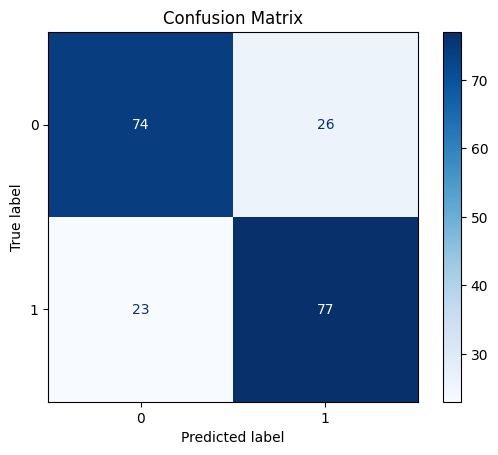



Results from model:  Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       100
           1       0.77      0.82      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200

Accuracy: 0.785
Precision: 0.786
Recall: 0.785
F1 Score: 0.785
AUC: 0.785


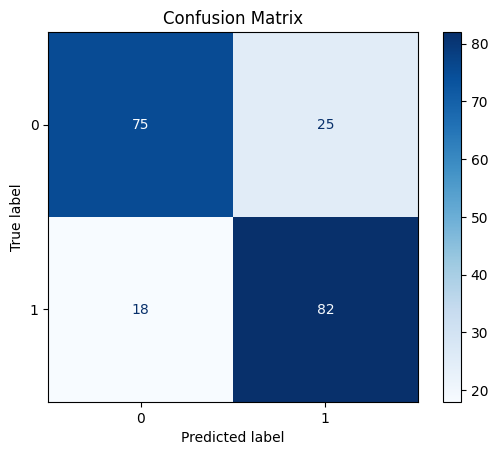



Results from model:  Random Forest
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.80      0.86      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Accuracy: 0.825
Precision: 0.827
Recall: 0.825
F1 Score: 0.825
AUC: 0.914


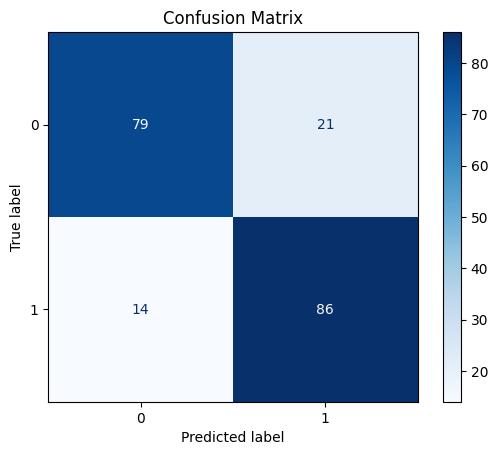



Results from model:  SVM
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       100
           1       0.73      0.77      0.75       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy: 0.745
Precision: 0.746
Recall: 0.745
F1 Score: 0.745
AUC: 0.818


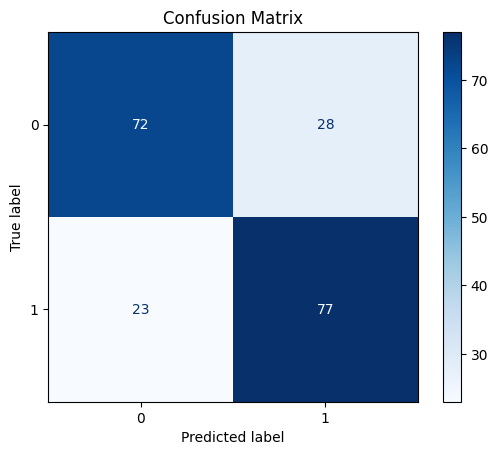



Results from model:  KNN
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       100
           1       0.73      0.83      0.78       100

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200

Accuracy: 0.760
Precision: 0.765
Recall: 0.760
F1 Score: 0.759
AUC: 0.837


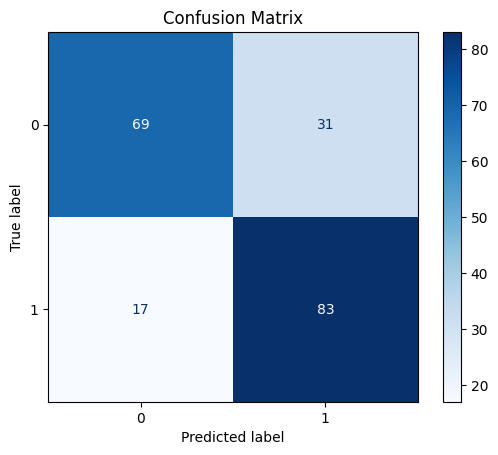



Results from model:  XGBoost
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       100
           1       0.82      0.84      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Accuracy: 0.825
Precision: 0.825
Recall: 0.825
F1 Score: 0.825
AUC: 0.892


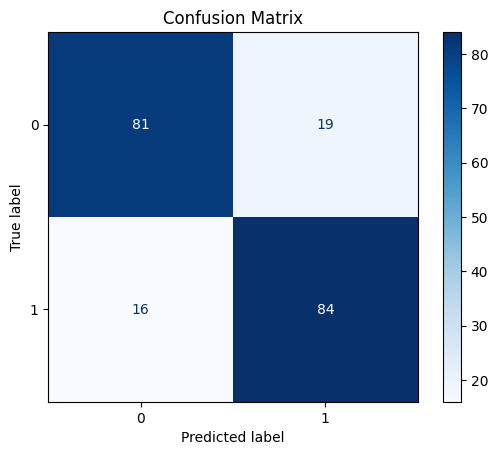



Results from model:  Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       100
           1       0.71      0.78      0.74       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Accuracy: 0.730
Precision: 0.732
Recall: 0.730
F1 Score: 0.729
AUC: 0.818


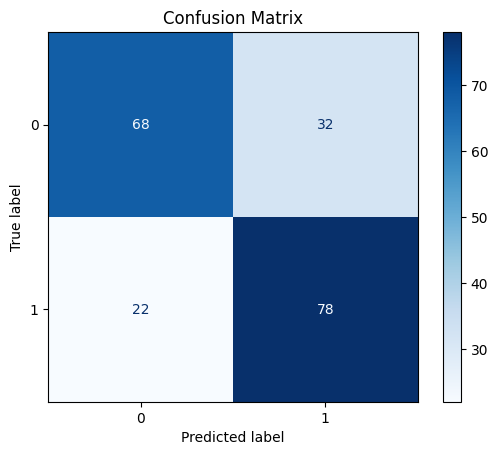

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.755,0.755230,0.755,0.754945,0.82850
1,Decision Tree,0.785,0.786403,0.785,0.784736,0.78500
2,Random Forest,0.825,0.826600,0.825,0.824785,0.91435
3,SVM,0.745,0.745614,0.745,0.744841,0.81840
4,KNN,0.760,0.765198,0.760,0.758818,0.83705
5,XGBoost,0.825,0.825293,0.825,0.824961,0.89200
6,Naive Bayes,0.730,0.732323,0.730,0.729323,0.81800


In [408]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "SVM": SVC(probability=True, max_iter=10000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

results = []
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set

    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print("Results from model: ", name)

    # Printing the classification report including metrics such as precision, recall, and F1-score
    print(classification_report(y_test, y_pred, target_names=np.unique(y).astype(str)))

    # Calculating additional classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc=roc_auc_score(y_test, y_prob) if y_prob is not None else None


    results.append({
        "Model": name,
        "Accuracy": accuracy, # report["accuracy"],
        "Precision": precision, # report["1"]["precision"],
        "Recall": recall, # report["1"]["recall"],
        "F1-Score": f1, # report["1"]["f1-score"],
        "AUC": auc # auc
    })

    # Printing calculated metrics

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC: {auc:.3f}")

    # Calculate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Display the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    print("\n")

results_df = pd.DataFrame(results)
results_df

## Analysis and Conclusion

After extensive data preprocessing, exploratory data analysis, feature engineering, and modeling, we have arrived at some insightful conclusions regarding the Pima Indians Diabetes dataset. The analysis was aimed at predicting diabetes disease, utilizing machine learning models to identify significant predictors and evaluate their performance.

### Model performances

**Random Forest Classifier** has proven to be the most effective to predict diabetes.

All performance metric (**Accuracy, Precision, Recall, F1-Score**) are around 0.825.

**AUC is 0.91** which is considered an excellent value.

### Summary

We have started our work by analyzing the given dataset and performing data cleaning especially with respect to null nd zero values.
We also detected a lot of outliers, and given the limited size of the dataset we decided to not remove them and applying capping methods based on the IQ range.

Due to the imbalanced classed, we also used SMOTE to increment the data for the imbalanced class.

Finally, we build models based on different algorithms to identify the one with better overall performance, which has proven to tbe Random Forest Classifier with an accuracy of 83.5% and an AUC of 0.91.

### Recommendations for Future Work

Reduced size of the dataset is a strong limitation, so one way to improve our models will be to integrate additional datasets if available in order to provide more data during the training process.

Also, more advanced models like Neural Networks or stacked models could be used to buold better algorithm with performance metrix (especially accuracy) constantly over 90%.